In [1]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("Path to dataset files:", path)

df = pd.read_csv(path + "/spam.csv", encoding="latin-1")
df.head()
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
texts = df['v2'].tolist()
labels = df['v1'].tolist()

from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)


Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(val_texts)

In [8]:
#random forest
from sklearn.ensemble import RandomForestClassifier

#parameter tuning
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=5,
    random_state=42
)
random_search.fit(X_train, train_labels)
print(random_search.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [9]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, min_samples_leaf =1, max_depth = 10)
model.fit(X_train, train_labels)
preds = model.predict(X_test)

Accuracy: 0.9220
Precision: 1.0000
Recall: 0.4161
F1 Score: 0.5877


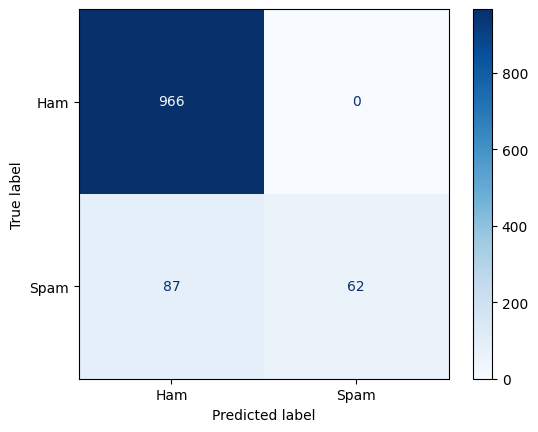

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(val_labels, preds)
precision = precision_score(val_labels, preds)
recall = recall_score(val_labels, preds)
f1 = f1_score(val_labels, preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(val_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.show()
